# Chapter 9: Machine Learning

## Machine Learning Application in Geospatial Data

**Author: Dr. Suborna Ahmed**

In Machine Learning, Python is widely used and many Python libraries are built for analyzing geodata. You have applied many Python modules on Geospatial data already. Now, you will apply some of those modules (i.e., NumPy, Matplotlib) along with a few more new modules that are built for application of Machine Learning techniques for prediction. We will also apply some methods that you have learned in the Linear Regression course (i.e., developing statistical models and checking assumptions). 

## <span style="color:blue"> Learning Objectives:</span>  

* What is Machine Learning
    + General Characteristics
    + Terminologies
* Why Use ML in Remote Sensing/GIS?
* scikit-learn
* Load and Analyze Iris dataset
* Fitting Models 
* Overfitting Models
* Setup the environment
    + Activate Libraries
    + Load dataset
* Different Approaches to Reduce Overfitting
* Training, Validation, and Test data
* Types of Algorithms
    + Supervised algorithms
    + Unsupervised algorithms
* Popular Algorithms: 
    + k-Nearest Neighbors
    + Popular Algorithms: CART
    + Random Forest
* Analyze a Real Data and Assessing the Model Accuracy

## 1. What is Machine Learning?

* Machine learning (ML) is the process by which a computer solves a task that it was not explicitly programmed to do. In Machine Learning algorithm statistical methodologies are combined with computer science technologies to train algorithms to learn the pattern in the training data and apply them onto an untrained dataset. For example we can use ML techniques to:
> Predict a classification for a new image <br>
> Identify an email as spam <br>
> Forecast storm movement <br>

* Machine learning is a subset of artificial intelligence (AI).
* Artificial intelligence is a computer’s ability to “learn” and make decisions.


References: <a href="https://github.com/ageron/handson-ml" target="_blank">More information can be found here</a>.



### 1.1. General Characteristics:
* Prioritizes predictive accuracy 
* Less focus on inference/hypothesis testing
* Handles big-data:
    + Large number of observations? <br>
    + Large number of independent variables?
    


### 1.2.Terminologies:
* Independent variables:
    + Attribute
    + Feature
    + Predictor
    + Field
* Outcome or Result or Predicted Values
* Error Estimate: Mean squared error (MSE) (in Statistics)
    + Loss Function
* Dimensionality

## 2. Why Use ML in Remote Sensing/GIS?

In spatial analysis, ML is a popular component and the algorithm is applied on geoprocessing tools. 

1. Classification $\Rightarrow$ create land-cover classification layer
2. Clustering $\Rightarrow$ process a large data and identify probable clusters 
3. Prediction $\Rightarrow$ predictive modelling through weighted regression 

Reference: <a href="https://www.esri.com/about/newsroom/arcwatch/where-deep-learning-meets-gis/" target="_blank">More information can be found here</a>.

Further, many other interesting tasks require (or benefit from) machine learning: 
* Imputing missing information
* Transforming spectral information
* Masking clouds
* Forecasting crop growth
* ML models can scale in a way that humans cannot

## 3. scikit-learn 

+ Arguably the most popular language for ML
+ By the far the most popular module is scikit-learn
+ So popular that it comes prepackaged with Anaconda!
+ scikit-learn is built on top of NumPy, SciPy, and matplotlib
+ Open source with a very active community
+ Tons of tools and algorithms ready to go
+ Built-in sample datasets to practice and explore!
+ `sklearn` is an alias for scikit-learn. 

**References:**
* <a href= "https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/"> A brief history, basic functionality and quick learining references can be found on this site.</a>

* <a href ="https://www.digitalocean.com/community/tutorials/how-to-build-a-machine-learning-classifier-in-python-with-scikit-learn"> Read this webpage for learing to build a ML Classifier in Python with Scikit-learn</a>

- <a href= "https://scikit-learn.org/stable/index.html"> Detail guidelines of main features of scikit-learn can be found on this site. </a>

![sci-kit.PNG](week1213_img/sklearn.png)

## 4. Setup the Environment
Prepare your Notebook to apply main features of sci-kit learn.

In [1]:
# load here or from Command Prompt
!pip install -U scikit-learn

In [2]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import rasterio

### 4.1. The Famous Iris Dataset 

- One of the most famous datasets in ML.
- Empirical measurements of 150 iris flowers.
- Features:
> petal length <br>
> petal width <br>
> sepal length <br>
> sepal width <br>

- Target:
> Can we predict its species?


- It's essential to familiarize ourselves with the data before diving into analysis or modeling. Take some time to explore its structure, contents, and nuances.
- Upon initial observation, you'll notice that the data predominantly resembles numpy arrays.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

Reference: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html



In [3]:
# Load iris data
from sklearn.datasets import load_iris  # import the dataset
iris_dataset = load_iris()

### 4.2. Objects in the Iris Data

**Keys** – all the different aspects of our dataset that we can call.<br> 
**Feature_names** – the names of the measurements that we will use to try to predict classification.<br> 
**Data** – the actual measurements from feature_names. Does not include the targets!<br> 
**Target** – the classifications we are trying to predict.

**view the different attributes (or keys) of our dataset object**

In [4]:
print("attributes of iris_dataset: \n" + str(iris_dataset.keys()))

attributes of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


**view the different features (attributes or characteristics)**

In [5]:
print("features: \n" + str(iris_dataset.feature_names)) 

features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**view the names of the *target classes* in the dataset**

In [6]:
print("targets: \n" + str(iris_dataset.target_names))

targets: 
['setosa' 'versicolor' 'virginica']


**view the shape (dimensions) of the dataset's main data: this will give the number of samples (flowers) and the number of features (measurements).** 
- The `.shape` attribute is a tuple indicating the dimensions of a numpy array.

In [7]:
print("dataset dimensions: \n" + str(iris_dataset.data.shape)) 

dataset dimensions: 
(150, 4)


**view the shape (dimensions) of the target data.** 
- The *target data* usually has one dimension, indicating the number of samples.

In [8]:
print("target data dimensions: \n" + str(iris_dataset.target.shape))

target data dimensions: 
(150,)


**Have a look at the some of the data and the keys:**

- select the first 10 rows and all columns (4 measurements:) of the data:

In [9]:
print(iris_dataset.data[0:10, :]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


- prints the **target values (species labels)** for the first 10 flowers in the dataset: in the context of the Iris dataset, this would typically show all `setosa` since the dataset is ordered by species.

> "0" typically corresponds to the species 'setosa'.<br>
> "1" would correspond to 'versicolor'.<br>
> "2" would correspond to 'virginica'.<br>

In [10]:
print(iris_dataset.target[0:10]) 

[0 0 0 0 0 0 0 0 0 0]


### 4.3. Overfitting and Underfitting Models

`````{admonition} Overfitting 
:class: tip
    
Overfitting is one of the most common pitfalls in machine learning. When a model is overfitted, it means it has **learned the training data exceptionally well**, including its noise and outliers, to the point where it **performs poorly on new, unseen data.**
    
``````

<blockquote>
    
**Characteristics of Overfitting:**

- The model performs exceptionally well on the training data: might pass through almost **every** single data point, including any noise or anomalies.
- The model performs poorly on the test data or new, unseen data.
- The model is too complex, with too many parameters (a high-degree polynomial).
</blockquote>

`````{admonition} Underfitting
:class: tip
    
Underfitting occurs when a machine learning model is **too simplistic to capture the underlying structure or pattern of the data**.
    
``````

<blockquote>
    
**Characteristics of Underfitting:**

- The model performs poorly on both the training data and the test data.
- The model is too simple, might not have enough parameters.
- Eg: a linear model, which can only produce straight lines, is too simplistic to capture the sinusoidal nature of a sine curve.
</blockquote>

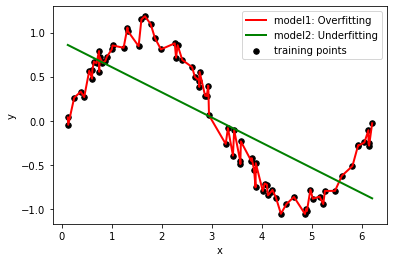

In [11]:
# Generate sample data based on a sine curve
np.random.seed(0) # set seed for reproductivity
x = np.sort(2 * np.pi * np.random.rand(80, 1), axis=0)  # Generating data points between [0, 2π]
y = np.sin(x).ravel() + np.random.normal(0, 0.1, x.shape[0])  # sine curve with added noise

# Overfitting model (using KNeighborsRegressor with n_neighbors=1)
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_neighbors=1).fit(x, y)

# Underfitting model (fit a linear regression model)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x, y)

# Plot
plt.scatter(x, y, color='black', s=30, marker='o', label="training points")
plt.plot(x, model1.predict(x), color='red', linewidth=2, label="model1: Overfitting")
plt.plot(x, model2.predict(x), color='green', linewidth=2, label="model2: Underfitting")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


**Questions to Consider:**
> Which model would be more successful at predicting new, “unseen” data? <br>
> Red (model 1) or green (model 2)?

The plot aims to demonstrate two different models and how they relate to the training data, illustrating the concepts of overfitting, underfitting.


- Black points are measured data: they seem to follow a pattern but have some random noise associated. 

Let’s pretend I created two different ML models, red and green, and their predictions are shown here. If we added more data to the right, which of these two models would be more successful at getting the trend correct?

- Model1: Overfitting:<br>
This model is represented by the red line. It's an instance of extreme overfitting. Since it tries to pass through every training point, it also captures the noise, which is not ideal. <br>
In a real-world scenario, this model would likely perform poorly on new, unseen data because it's too closely tailored to the training data. <br>
For unseen data points that fall very close to the original training data, the predictions might be reasonable. However, for data points that fall between two training points or outside the range of the training data, the predictions can be erratic. Since the model is influenced heavily by noise, it might predict sharp jumps or falls where the actual function might be smooth. Additionally, if the new data points don't contain the same noise as the training data, the overfit model's predictions would be inaccurate.


- Model2: Underfitting:<br>
Represented by the green line, this is a simple linear regression model. Given that the underlying data is based on a sine curve, a straight line is too simple to capture the data's inherent patterns. Hence, the model underperforms both on training and, likely, on unseen data, fails to capture the underlying structure of the data.<br>
Given that this model is too simplistic, it would consistently predict values along a straight line regardless of the inputs. It won't be able to capture the oscillating behavior of the sine curve.


#### 4.3.1.Different Approaches to Reduce Overfitting

* Reduce the number of training epochs (aka ‘runs’)
[Reference to learn epochs.](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)

* Limit the number of parameters

* Penalize large values for fitting parameters (‘regularization’)
    + Tends to smooth results
    
* Ensemble models
    + Train many different models, then take the average of their predictions
    + Extremely common!
    
* Separate training, test, and validation data

#### 4.3.2. Different Approaches to Reduce Underfitting
* Increase Model Complexity:
    + Simple models are more likely to underfit. Adding complexity, like additional layers in neural networks or higher-degree features in polynomial regression, can help.
* Add More Features:
    + Sometimes, the model might not have enough information to make accurate predictions. Consider engineering new features or using more available features.
* Reduce Regularization
* Ensemble Methods
* Cross-validation

![model_complexity.png](week1213_img/model_complexity.png)

[Figure Reference](https://towardsai.net/p/machine-learning/underfitting-overfitting%E2%80%8A-%E2%80%8Athe-thwarts-of-machine-learning-models%E2%80%8Baccuracy)

* Rare to see models that are NOT ensembled! 
* It's crucial to continuously monitor and diagnose model performance.
* Identifying underfitting early on can save valuable resources and guide you to adjust the model or training process accordingly.
* We don’t want to get too far into this though, so we’ll just focus on the most inescapable: our dataset. 
* Very important to consider overtraining whenever you do any ML task.


[Reference on overfirrintg and underfitting](https://medium.com/@itbodhi/overfitting-and-underfitting-in-machine-learning-models-76cb60dbdaf6)

The figure above is a typical visualization in machine learning called the **"Bias-Variance Tradeoff" or "Model Complexity vs. Generalization Error" curve**.

The plot typically shows the relationship between the **complexity of a model** (e.g., depth of a decision tree, degree of a polynomial in regression) and its performance on both training data and validation/test data.


- Training Error is the error that you get when you test your model on the data that you trained on. It represents how well the model has learned the training data.

- Generalization Error is the error that you get when you test your model on new, **unseen** data. It represents how well the model can generalize its knowledge from the training data to new data. 

In this figure:

> Underfitting: When the model is too simple, it may not capture the underlying patterns in the data. This leads to poor performance on both training and test datasets. This is the left side of the plot.<br>

> Overfitting: If the model becomes too complex, it might start to fit the noise in the training data, thinking it's a pattern. While it will have a very high accuracy on the training data, its performance on unseen (test) data will decrease. This is the right side of the plot.<br>

> Sweet Spot: As the model becomes more complex, its performance on the training data improves. More importantly, its performance on the test data also improves, but only up to a certain point. This point, where the test performance is optimal, is often called the "sweet spot" because it represents a good balance between bias (error due to overly simplistic models) and variance (error due to overly complex models that are too sensitive to the training data).




### 4.4. Training, Validation, and Test data

1. **Training data**: the data that your model uses to “learn”.
2. **Validation data**: “unseen” data points that are used to assess how well the model learned
    + We consider models that are more successful at predicting the test data to be more predictive, i.e. “better”
    + Used repeatedly during training to assess the model fit
3. **Test data**: additional “unseen” data that is used to assess the final model
    + These are held out until the very, very end

[Reference on training, test and validation data.](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
<br>
<br>
Sometimes we just have two sets of data. In this case, there is no difference between the test and the validation. In that case, we usually just call it test data. Mostly only separate validation and test data when we are bootstrapping and ensembling models. 
* Test and validation data only need to be separated during more advanced techniques!
* We will not distinguish between test and validation data here.

#### 4.4.1. Separate Iris Data  into Train and Test Data

Set aside some of the data for training and some for testing.
<br>
This code demonstrates how to split the iris dataset into `training` and `testing` sets using the `train_test_split function` from `sklearn module`. The training set will be used to train a machine learning model, while the testing set will be used to evaluate the model's performance on data it hasn't seen during training.
- By default, this function splits the data in a 75% (training) to 25% (testing) ratio.

In [12]:
from sklearn import model_selection
# x represents the features that we have (petal and sepal characteristics)
# y represents the targets that we are trying to predict
# train_test_split separates the data into matching test and train sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris_dataset.data, iris_dataset.target)

In [13]:
print("x_train dimensions:" + str(x_train.shape))
print("x_test dimensions: " + str(x_test.shape))
print("y_train dimensions: " + str(y_train.shape))
print("y_test dimensions: " + str(y_test.shape))

x_train dimensions:(112, 4)
x_test dimensions: (38, 4)
y_train dimensions: (112,)
y_test dimensions: (38,)


- `iris_dataset.data`: contains the features (e.g., petal and sepal lengths and widths) of the iris dataset.

In [14]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- `iris_dataset.target`: contains the target labels (e.g., species of iris like setosa, versicolor, virginica). <br>
The values 0, 1, and 2 in iris.target correspond to the three different species of the Iris flower.

In [15]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Continue exploring your data:**
* Scatter plots are a quick way to start exploring
* Here, the colors correspond to the three species

In the following code the argument ‘c’ stands for ‘color’ in plt.scatter. Basically, use the y values (i.e. the species) to determine the colors. Three values present in y_train (0,1,2), so we end up with three colors. 

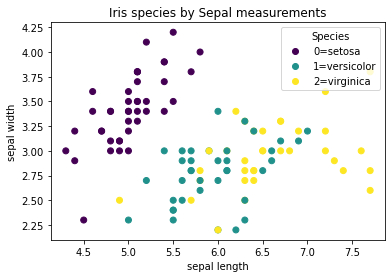

In [16]:
# visualize the training data!
plt.figure(1)
scatter = plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Iris species by Sepal measurements")
labels = ["0=setosa", "1=versicolor", "2=virginica"]
plt.legend(handles=scatter.legend_elements()[0], title="Species", labels=labels, loc="upper right")
plt.show()

Below, the argument ‘c’ stands for ‘color’ in plt.scatter. Basically, use the y values (i.e. the species) to determine the colors. Three values present in y_train (0,1,2), so we end up with three colors. 

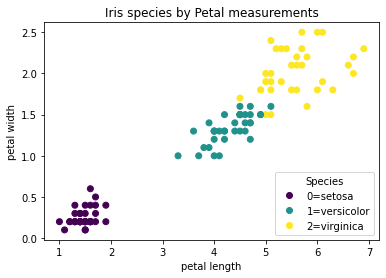

In [17]:
# visualize the training data another way!
plt.figure(2)
scatter = plt.scatter(x_train[:,2], x_train[:,3], c=y_train)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Iris species by Petal measurements")
labels = ["0=setosa", "1=versicolor", "2=virginica"]
plt.legend(handles=scatter.legend_elements()[0], title="Species", labels=labels, loc="lower right") 
plt.show()

## 5. Types of Algorithms

ML approaches broadly separated into **supervised learning** and **unsupervised learning**.

* **Supervised algorithms** learn from known examples
    + Require input data with output labels
    + Make “decisions” about new information and assign labels learned during training

* **Unsupervised algorithms** learn directly from unlabelled data
    + Only require input data
    + Look for patterns and structure in the data

### 5.1. Supervised Algorithms
In supervised algorithm Major classes are `classification` and `regression` algorithms.

Classification of Supervised learning:

1.**Classification**
* Prediction of categorical outcomes
* Logistic regression

2.**Regression** 
* Prediction of continuous outcomes
* Linear regression


**Advantages:**
* Outputs are easier to understand 
* Match the input data
* Generally higher success rates

**Disadvantages:**
* Require lots of labelled training data – hard to come by!
* Outputs are only as good as your inputs
* Garbage in, garbage out

**Examples:**
* Classify land cover based on labelled training data
* Identify handwritten characters
* Predict age of a stand based lidar point cloud

Things to remember:
- Classification provides a class label (categorical variables).
- Regression provides a continuous number (continuous variables).

### 5.2. Unsupervised Algorithms

In unsupervised learning, the algorithm is provided with input data without explicit instructions on what to do with it. 

1.**Clustering**: to divide a dataset into groups (or clusters) based on some similarity measures. 
* K-Means clustering
* Hierarchical clustering

2.**Dimensionality Reduction**: reducing the number of random variables under consideration and obtaining a set of principal variables.
* Principal Component Analysis (PCA)
* Singular Value Decomposition (SVD)


**Advantages:**
* Does not require labeled data
* Can find things in data that a human would not know to look for

**Disadvantages:**
* Generally less successful than supervised algorithms
* Outputs can be difficult to understand

**Examples:**
* Segment an image based on land cover (without any independent training data)
* Determine the characteristic patterns in a time series
* Identify the most correlated pixels in a pair of images

### 5.3. Popular Supervised Algorithms – Linear Regression
* Most popular is by far the ordinary least squares (OLS)
* Used extensively for both regression and (binary) classification tasks
* In regression, used to predict a number
* In classification, used to predict a class by finding the “decision boundary” between two classes
* Finds slope and intercept that best fit the training data
    + “Best fit” for OLS means minimizing mean squared error between predictions (your line) and targets (actual values)
    
**Assumptions:**

* Errors are normally distributed
* Errors are homoscedastic
* Mean of errors is 0
* No autocorrelation

**Advantages:**
* Easy to understand and implement
* Very efficient

**Disadvantages:**
* Strict assumptions
* Coarse tool – cannot capture much nuance in the data


### 5.4. Popular Algorithms: k-Nearest Neighbors

* About as simple as it gets!
* Each new test point is assigned the same class as the point nearest it
* k = number of neighbors to use
E.g. if k=3, use the mode of the 3 nearest neighbors to determine class of the point

**Advantages:**
* Few parameters

**Disadvantages:**
* Can be slow
* Works poorly with high-dimensional data

The following example plot the KNN algorithm with two subplots.
<br>
First need to generate some data points, we create some points belonging two classes and also the test points which we want to use the KNN algorithm to predict the classes for them.

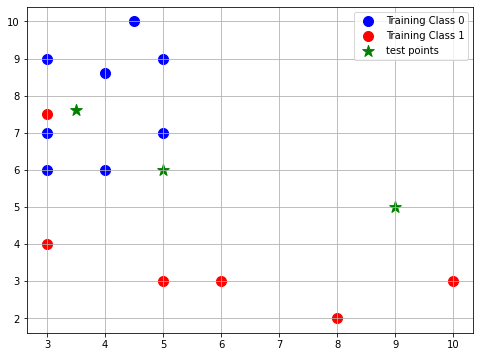

In [48]:
# Generate training data points
class_0 = np.array([[3, 6], [4.5, 10], [3, 9], [4, 6], [5, 7], [3,7], [4, 8.6], [5, 9]])
class_1 = np.array([[3, 7.5], [3, 4], [5, 3], [6, 3], [8,2], [10, 3]])
test_points = np.array([[3.5, 7.6], [5,6], [9,5]])

plt.figure(figsize=(8,6))

# plot training classes
plt.scatter(class_0[:, 0], class_0[:, 1], marker='o', label='Training Class 0', s=100, color='blue')
plt.scatter(class_1[:, 0], class_1[:, 1], marker='o', label='Training Class 1', s=100, color='red')
# Plot test point
plt.scatter(test_points[:, 0], test_points[:, 1], marker='*', label='test points', s=150, color='green')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()

After creating two distinct classes: class_0 and class_1. To train the KNN classifier, we need to concatenate all the training samples together and provide the corresponding labels, allowing it to then identify the nearest neighbors for any test points.

In [49]:
# Concatenate class_0 and class_1 data to create a single training dataset
train_data = np.vstack([class_0, class_1])
train_labels = np.array([0] * len(class_0) + [1] * len(class_1))

# import Pandas to print the training data points and its corresponding Class (label) in a DataFrame
import pandas as pd

# Convert the train_data and train_labels to a DataFrame
df = pd.DataFrame(train_data, columns=['X', 'Y'])
df['Class'] = train_labels
print(df)

       X     Y  Class
0    3.0   6.0      0
1    4.5  10.0      0
2    3.0   9.0      0
3    4.0   6.0      0
4    5.0   7.0      0
5    3.0   7.0      0
6    4.0   8.6      0
7    5.0   9.0      0
8    3.0   7.5      1
9    3.0   4.0      1
10   5.0   3.0      1
11   6.0   3.0      1
12   8.0   2.0      1
13  10.0   3.0      1


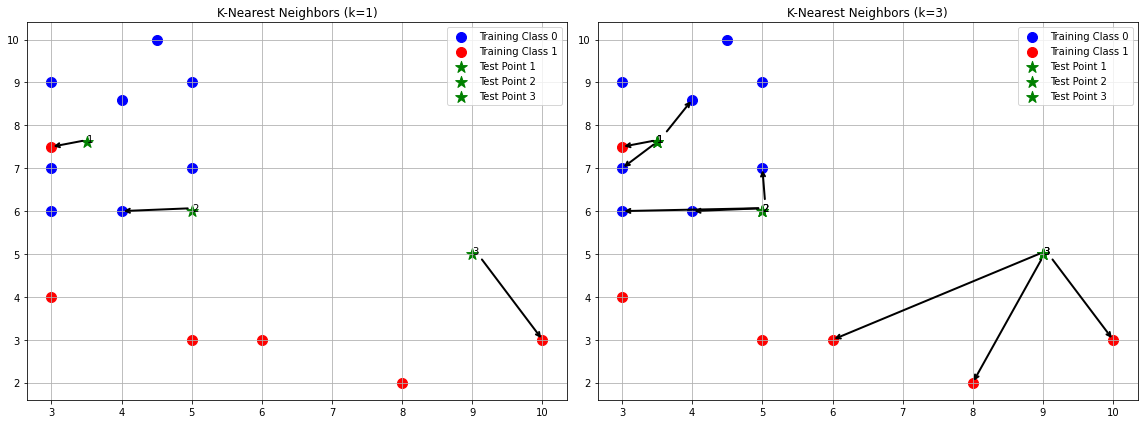

In [56]:
# Create a subplot with 1 row and 2 columns (side-by-side plots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot data and nearest neighbors for k=1 and k=3
for ax, k in zip(axes, [1, 3]):
    # Plot training data
    ax.scatter(class_0[:, 0], class_0[:, 1], marker='o', label='Training Class 0', s=100, color='blue')
    ax.scatter(class_1[:, 0], class_1[:, 1], marker='o', label='Training Class 1', s=100, color='red')
    
    # Using KNN to get nearest neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    nearest_neighbors = knn.kneighbors(test_points, return_distance=False)
    
    # Plot test points and draw arrows to their nearest neighbors
    for i, test_point in enumerate(test_points):
        added_label = False # used to track whether a label for a test point has been added to the plot yet (for k=3)
        for neighbor_index in nearest_neighbors[i]:
            nearest_neighbor = train_data[neighbor_index]
            if not added_label:
                ax.scatter(test_point[0], test_point[1], marker='*', s=150, color='green', label=f'Test Point {i+1}')
                added_label = True
            else:
                ax.scatter(test_point[0], test_point[1], marker='*', s=150, color='green')
            ax.annotate(f'{i+1}', xy=nearest_neighbor, xytext=test_point, arrowprops=dict(facecolor='black', arrowstyle='->', lw=2))
    
    ax.set_title(f'K-Nearest Neighbors (k={k})')
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

From this example:
- When we use k = 1, test point 1 is predicted to be class 1; test point 2 is predicted to be class 0; and test point 3 is predicted to be class 1.
- When we use k = 2, test point 1 is predicted to be class 0; test point 2 is predicted to be class 0; and test point 3 is predicted to be class 1.

### 5.5. Popular Algorithms: CART
* Supervised
* Classification and Regression Trees
    + Aka “decision trees”
* Effectively a bunch of if/else statements



https://jwoodscience.springeropen.com/articles/10.1186/s10086-020-01904-0

**References:**
* My articel published this year: <a href= "https://jwoodscience.springeropen.com/articles/10.1186/s10086-020-01904-0"> Application of Decision Tree Based Techniques to Veneer Processing.</a>
![article.png](week1213_img/article.png)

### 5.6. Random Forest
* Possibly THE most popular ML algorithm.
* Incorporates many, many CARTs
    + Make many different CARTs based on the training data, then combine them
* Each new piece of data is tested on all the trees
    + Output classification is assigned by voting

**Advantages:**
* Overfits less than a single CART

**Disadvantages:**
* Takes longer to train and evaluate
* Performs poorly on high dimensional data

### 5.7 Training a ML Model

Let’s use a CART to classify the Iris data. Yes, it really is this easy!
<br>
Th3 code initializes a Decision Tree classifier, trains it on provided training data (x_train and y_train), and then uses the trained classifier to predict labels for the test data (x_test). 

In [18]:
# training your first classifier! Let's use a CART.
from sklearn import tree
classifier = tree.DecisionTreeClassifier()  # create an instance of the classifier
classifier = classifier.fit(x_train, y_train)  # train it! Only show it the training data

predictions = classifier.predict(x_test)  # generate predictions!
print("Predictions has some shape as y_test: " + str(predictions.shape))

Predictions has some shape as y_test: (38,)


In [19]:
predictions 

array([2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1])

### 5.8. Assessing the Model Accuracy

* No unified way to assess unsupervised model accuracy
* Key metrics for supervised (classification) algorithms:
    + User’s accuracy
    + Producer’s accuracy
    + Kappa coefficient
    + Precision/recall
    + F1-score

### 5.9. Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that visualizes the performance of an algorithm. Its primary purpose is to showcase the actual versus the predicted classifications provided by the classifier.

The matrix itself is relatively simple in structure. It consists of two dimensions:

- Actual Class: The true classifications of the test data.
- Predicted Class: The classifications predicted by the model.

**Advantages of using a Confusion Matrix:**
- It provides a detailed breakdown of prediction errors in each category.
- It's a great tool for understanding the performance beyond just accuracy.

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 9,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 16]])

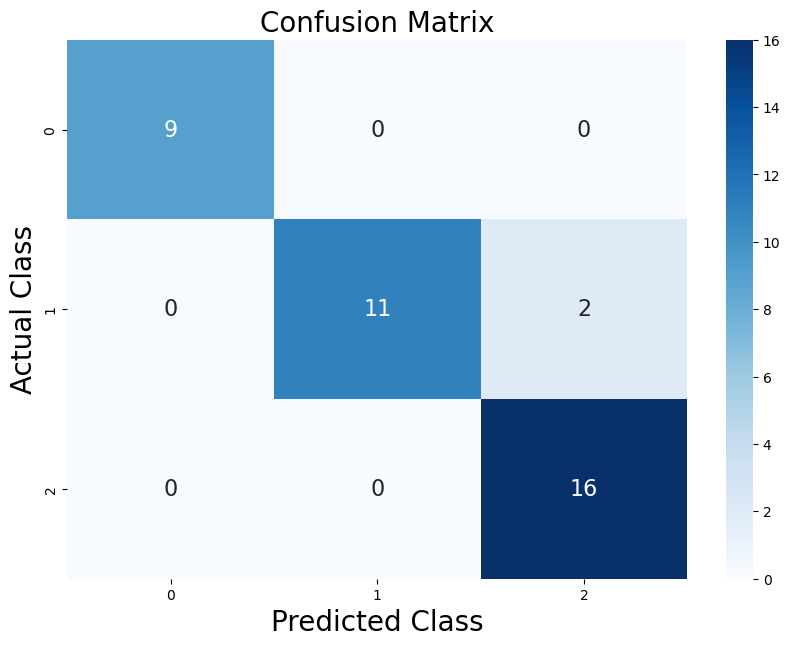

In [21]:
# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Actual Class', fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

* Anything on the diagonal is “good”
    + Means that the prediction is correct
* Anything off the diagonal is “bad”
    + Means the prediction was incorrect! <br>
* The deeper the color, the higher the value, which means the model made more predictions of that particular type.
*  Each cell in the heatmap is annotated with the actual value from the confusion matrix. This provides a clear count of how many times a particular classification outcome occurred.

### 5.10. Kappa Coefficient

$$ \kappa = \frac{p_o - p_e}{1 - p_e}
$$
* $p_o$ = accuracy (fraction correctly predicted)
* $p_e$ = probability of chance agreement
* $\kappa$ = 1:
    + Perfect agreement
* $\kappa$ = 0:
    + Agreement is the same that we would expect from pure chance
* $\kappa$ < 0:
    * Agreement is worse than we would expect from pure chance 


## 6. Problem-Solving Framework

1. Get to know your data
    + How is it organized? What shape is it?
    + Are there missing values?
    + How big is it?
2. State your objective
    + What should my output look like? How will I know if I’m successful?
3. Decide on an algorithm
    + Supervised or unsupervised?
    + How simple or complex?
4. Build and run a model
5. Assess your results
    + Are they what I expected?
    + How could I improve my results?

* Let’s make a land cover classifier
* Use Landsat data as our predictor data
    + Using the Iris dataset as an analogy:
        + What are our “species”?
        + What are our “measurements”?
* Whether or not there has been a fire as target data

* Use rasterio to load our images into numpy arrays
* After loading, do some basic exploration

In [22]:
# assesssing the quality of our model

# accuracy: fraction of predictions that are correct
print("accuracy: " + str(np.mean(predictions == y_test)))  # use the fact that this expression is 1 where true and 0 where false
# alternative way to do the same thing: classifier.score(x_test, y_test)

accuracy: 0.9473684210526315


In [23]:
# confusion matrix and kappa coefficient
print(sklearn.metrics.confusion_matrix(y_test, predictions))
print(sklearn.metrics.cohen_kappa_score(y_test, predictions))

[[ 9  0  0]
 [ 0 11  2]
 [ 0  0 16]]
0.9184549356223176


In [24]:
##############################################################
# let's apply what we've learned to some real geospatial data!
##############################################################
landsat_path = "LC08_L1TP_20190702_image1.tif"
fires_path = "fires_clip_bi.tif"
validation_path = "LC08_L1TP_20190819_image2.tif"

In [26]:
#load in the first landsat image. This will be our training and test data
with rasterio.open(landsat_path, 'r') as src:
    landsat_arr = src.read()
    landsat_meta = src.meta

with rasterio.open(fires_path, 'r') as src:
    fires_arr = src.read()
    fires_meta = src.meta

print(landsat_arr.shape)  # get a little familiar with your data. How many bands do we have?
print(fires_arr.shape)

(7, 1974, 2457)
(1, 1974, 2457)


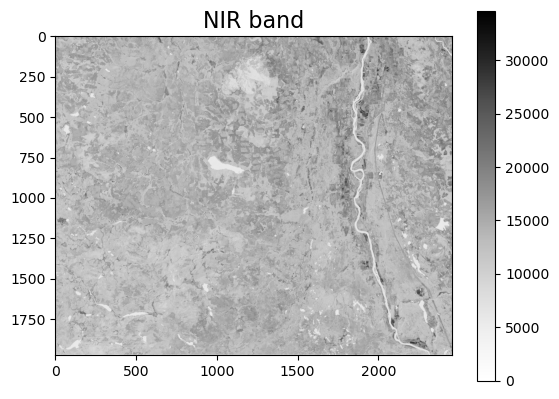

In [27]:
# do a quick visualization of NIR band
plt.imshow(landsat_arr[4,:,:], cmap="Greys")  # select Band 5 (NIR)
plt.colorbar()
plt.title("NIR band", fontsize=16)
plt.show()

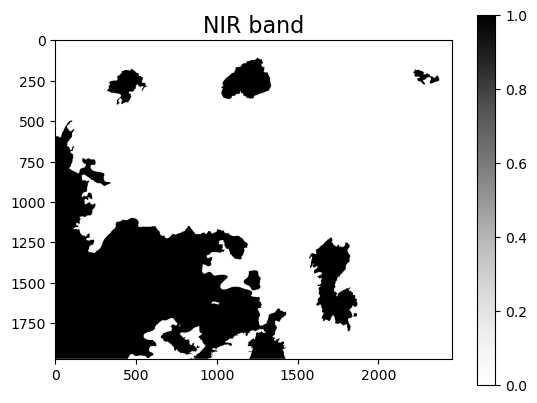

In [28]:
plt.imshow(fires_arr[0,:,:], cmap="Greys")  
plt.colorbar()
plt.title("NIR band", fontsize=16)
plt.show()

### Working Process
* We are going to use simple methods which do not consider the spatial relationship of pixels
* That means we can “flatten” our image
    + Use np.reshape() to turn it from (bands, rows, cols) to (bands, rows*cols)
* Need to rearrange it a little bit for sklearn
    + Remember that sklearn expects (samples, features), which means (pixels, bands) for geospatial data
    + Use np.swapaxes() to reverse the order

In [29]:
# sklearn expects data to be in numpy arrays with the shape (samples, features)
# in our case, that means (pixels, bands)
bands, rows, cols = landsat_arr.shape  # store these as variables for later
landsat_arr = np.reshape(landsat_arr, (bands, rows*cols))
print(landsat_arr.shape)
landsat_arr = np.swapaxes(landsat_arr, 0, 1)  # this is how sklearn will expect it
print(landsat_arr.shape)  # see how the shape is different now? It has the format (pixels, bands)

(7, 4850118)
(4850118, 7)


In [30]:
# reformat our target data the same way (i.e. labels of where there were and weren't fires)
fires_arr = np.reshape(fires_arr, (rows*cols))
print(fires_arr.shape)

(4850118,)


* We still want to divide our image into train and test data
> We can do this exactly the same way as before


In [31]:
# let's get ready to do some ML!
# separate out train/validation data
# x=actual, independednt, y=denendent, landsat
x_train, x_test, y_train, y_test = model_selection.train_test_split(landsat_arr, fires_arr)
print("x_train dimensions:" + str(x_train.shape))
print("x_test dimensions: " + str(x_test.shape))
print("y_train dimensions: " + str(y_train.shape))
print("y_test dimensions: " + str(y_test.shape))

x_train dimensions:(3637588, 7)
x_test dimensions: (1212530, 7)
y_train dimensions: (3637588,)
y_test dimensions: (1212530,)


### Train a CART and Make Predictions

In [32]:
classifier = tree.DecisionTreeClassifier()  # create an instance of the classifier
classifier = classifier.fit(x_train, y_train)  # train it! Only show it the training data
predictions = classifier.predict(x_test)
print("accuracy on our test data: " + str(classifier.score(x_test, y_test)))

accuracy on our test data: 0.8675686374770109


In [33]:
# check how our predictions look compared to the real thing
# make predictions over the whole image!
# NB - this is not great practice since this includes data the classifier has already seen (x_train is a subset of landsat_arr)
fire_labels_from_ml = classifier.predict(landsat_arr)

### Visualize the Results

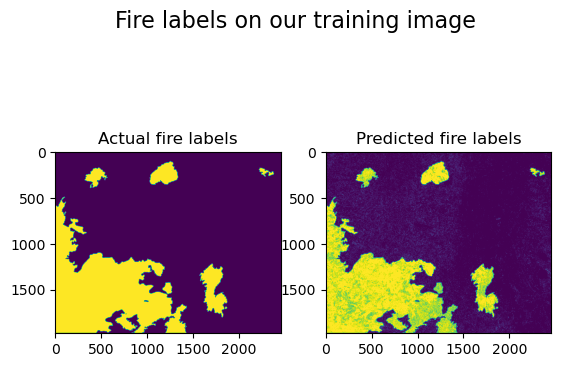

In [34]:
# make a plot comparing the known labels to the predicted labels
fig, axs = plt.subplots(1, 2)
fig.suptitle("Fire labels on our training image", fontsize=16)
axs[0].imshow(fires_arr.reshape(rows, cols))
axs[0].title.set_text("Actual fire labels")
axs[1].imshow(fire_labels_from_ml.reshape(rows, cols))
axs[1].title.set_text("Predicted fire labels")
plt.show()

### Concern and Application Plan
* What happens if we apply this classifier to a brand new image?
    + Our classifier has only ever seen one area on a single day
    + Now let’s try to apply it to the same area, but weeks later


In [35]:
# How does this model perform on data it has never seen before?
# Let's show it an image over the exact same area that was acquired on a different date (6 weeks later).
with rasterio.open(validation_path, 'r') as src:
    validation_arr = src.read()
    validation_meta = src.meta
print(validation_arr.shape)

(7, 1974, 2457)


In [36]:
# rearrange the array like we've done with the others
validation_arr = np.reshape(validation_arr, (bands, rows * cols))
validation_arr = np.swapaxes(validation_arr, 0, 1)

In [37]:
# now we just give this new data to our already-trained model to see what it thinks!
prediction_on_validation = classifier.predict(validation_arr)
print("accuracy: " + str(classifier.score(validation_arr, fires_arr)))
print("kappa: " + str(sklearn.metrics.cohen_kappa_score(fires_arr, prediction_on_validation)))

accuracy: 0.7591739005112865
kappa: 0.3175419732636314


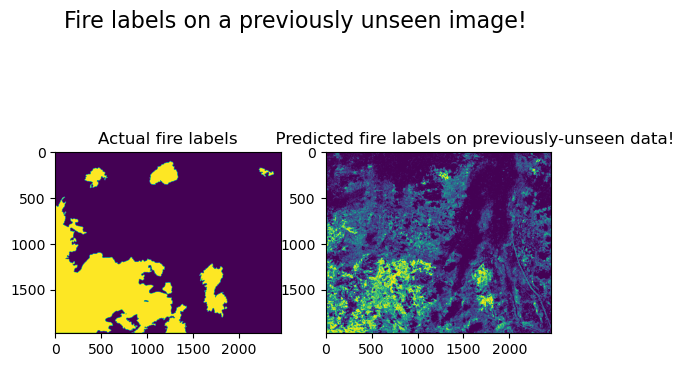

In [38]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("Fire labels on a previously unseen image!", fontsize=16)
axs[0].imshow(fires_arr.reshape(rows, cols))
axs[0].title.set_text("Actual fire labels")
axs[1].imshow(prediction_on_validation.reshape(rows, cols))
axs[1].title.set_text("              Predicted fire labels on previously-unseen data!")
plt.show()

### Debriefing the Results
* How did our classifier perform?
     + What measures did you use to assess?
* Did it do as well as you expected? 
* How could you improve its performance?

## Further Resources
* Courses on ML and data analysis at UBC:
    + EOSC 510 – Data Analysis for Earth and Ocean Sciences
    + CPSC 340 – Machine Learning and Data Mining
* Books (free through UBC library):
    + “Machine Learning: a Probabilistic Perspective” by Kevin Patrick Murphy
    + “Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow” by Auerlien Geron
    + “Introduction to Machine Learning with Python” by Andreas Muller and Sarah Guido
    + “Artificial Intelligence: Foundations of Computational Agents” by David Poole and Alan Mackworth
* Many, many free online courses

Some of the materials here are shared by Nich Leach.

```{admonition} Activity 

**Classification Algorithm:**
Try using a different classification algorithm on the fire data: 

* K-Nearest Neighbors (KNN): you can choose any number of k but start with 3 and can add more after testing it.
* Random Forest

<br>

**Compare and assess the model accuracies from these three algorithms:**

* K-Nearest Neighbors
* Random Forest
* CART: see the lecture notebook
Create a table and select the best alogorithm based on the model evaluation result.

|Evaluation Method| KNN | Random Forest |CART|
| --- | --- | --- | --- |
|Accuracy| ? | ? |?|
|Kappa Coefficient| ? | ?|?|

``````

`````{admonition} Steps for Each Algorithm 
:class: tip

Follow the same steps that were used in class:

1) Load the first Landsat 8 image and the fires information into numpy arrays. 

2) Restructure the arrays so that the Landsat 8 image has the format (pixels, bands) and the fires image has the format (pixels, ).

3) Split the arrays into training and test data.

4) Train your classifier and make predictions.

5) Assess the model's accuracy on the validation data.

6) Make predictions on the test data (i.e. a different Landsat image altogether). 

7) Assess the model's accuracy and kappa score on the test data.

``````

`````{admonition} Tips
:class: tip

**K-Nearest Neighbors (KNN)**

* For the KNN algorithm you need to import libraries:

```python
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
```

* Specify the classifier for the KNN:<br>
```python
classifier = KNeighborsClassifier(n_neighbors = 3)
```

Further Reading: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

**Random Forest**
* For the Random Forest algorithm you need to import libraries:<br>
```python
from sklearn.ensemble import RandomForestClassifier
```
    
* Specify the classifier for the Random Forest:<br>
```python
classifier = RandomForestClassifier()
```

``````

In [39]:
# Import all libraries here
!pip install -U scikit-learn
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import rasterio

In [40]:
# Import the dataset here
landsat_path = "LC08_L1TP_20190702_image1.tif"
fires_path = "fires_clip_bi.tif"
validation_path = "LC08_L1TP_20190819_image2.tif"

## Solution

### K-Nearest Neighbors (KNN) Application

(7, 1974, 2457)
(1, 1974, 2457)


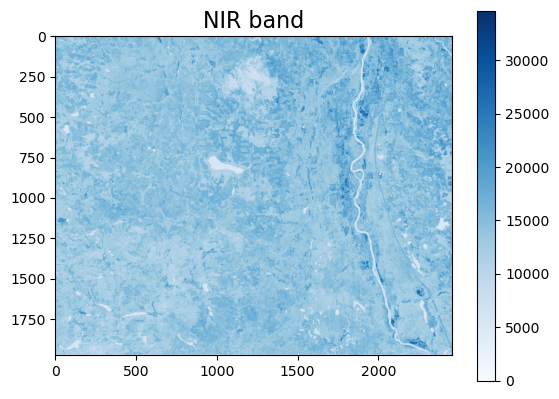

In [42]:
# load in the first landsat image. This will be our training and test data
with rasterio.open(landsat_path, 'r') as src:
    landsat_arr = src.read()
    landsat_meta = src.meta

with rasterio.open(fires_path, 'r') as src:
    fires_arr = src.read()
    fires_meta = src.meta

print(landsat_arr.shape)  # get a little familiar with your data. How many bands to we have?
print(fires_arr.shape)

# do a quick visualization of NIR band
plt.imshow(landsat_arr[4,:,:], cmap="Blues")  # select Band 5 (NIR)
plt.colorbar()
plt.title("NIR band", fontsize=16)
plt.show()

In [43]:
# sklearn expects data to be in numpy arrays with the shape (samples, features)
# in our case, that means (pixels, bands)
bands, rows, cols = landsat_arr.shape  # store these as variables for later
print(landsat_arr.shape)
landsat_arr = np.reshape(landsat_arr, (bands, rows*cols))
print(landsat_arr.shape)
landsat_arr = np.swapaxes(landsat_arr, 0, 1)  # this is how sklearn will expect it
print(landsat_arr.shape)  # see how the shape is different now? It has the format (pixels, bands)

# reformat our target data the same way (i.e. labels of where there were and weren't fires)
fires_arr = np.reshape(fires_arr, (rows*cols))
print(fires_arr.shape)

(7, 1974, 2457)
(7, 4850118)
(4850118, 7)
(4850118,)


**let's get ready to do some ML! - separate out train/validation data**

In [44]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = model_selection.train_test_split(landsat_arr, fires_arr)

In [45]:
print("x_train dimensions:" + str(x_train.shape))
print("x_test dimensions: " + str(x_test.shape))
print("y_train dimensions: " + str(y_train.shape))
print("y_test dimensions: " + str(y_test.shape))

x_train dimensions:(3637588, 7)
x_test dimensions: (1212530, 7)
y_train dimensions: (3637588,)
y_test dimensions: (1212530,)


accuracy on our test data: 0.8978491253824648
kappa_score on the test data:0.7077778321216126


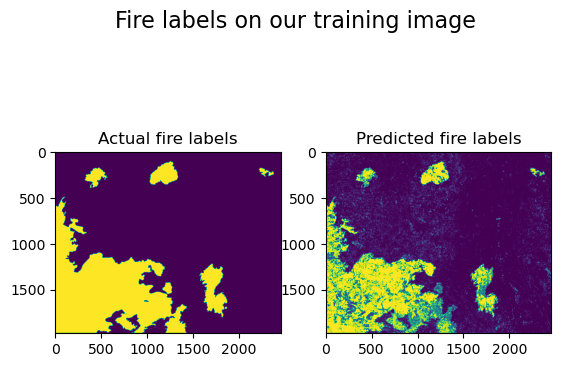

In [46]:
# this section takes sometime
# train a k-Nearest Neighbours
classifier = KNeighborsClassifier(n_neighbors = 3)  # create an instance of the classifier
classifier = classifier.fit(x_train, y_train)  # train it! Only show it the training data
predictions = classifier.predict(x_test)
print("accuracy on our test data: " + str(classifier.score(x_test, y_test)))
print("kappa_score on the test data:" + str(sklearn.metrics.cohen_kappa_score(y_test, predictions)))

# check how our predictions look compared to the real thing
# make predictions over the whole image!
# NB - this is not great practice since this includes data the classifier has already seen (x_train is a subset of landsat_arr)
fire_labels_from_ml = classifier.predict(landsat_arr)

# make a plot comparing the known labels to the predicted labels
fig, axs = plt.subplots(1, 2)
fig.suptitle("Fire labels on our training image", fontsize=16)
axs[0].imshow(fires_arr.reshape(rows, cols))
axs[0].title.set_text("Actual fire labels")
axs[1].imshow(fire_labels_from_ml.reshape(rows, cols))
axs[1].title.set_text("Predicted fire labels")
plt.show()

In [47]:
# How does this model perform on data it has never seen before?
# Let's show it an image over the exact same area that was acquired on a different date (6 weeks later).
with rasterio.open(validation_path, 'r') as src:
    validation_arr = src.read()
    validation_meta = src.meta

In [48]:
# rearrange the array like we've done with the others
validation_arr = np.reshape(validation_arr, (bands, rows * cols))
validation_arr = np.swapaxes(validation_arr, 0, 1)
print(validation_arr.shape)

(4850118, 7)


In [49]:
# it took 15 minutes to run
# now we just give this new data to our already-trained model to see what it thinks!
prediction_on_validation = classifier.predict(validation_arr)
print("accuracy: " + str(classifier.score(validation_arr, fires_arr)))
print("kappa: " + str(sklearn.metrics.cohen_kappa_score(fires_arr, prediction_on_validation)))

accuracy: 0.8177718562723628
kappa: 0.4502973017611259


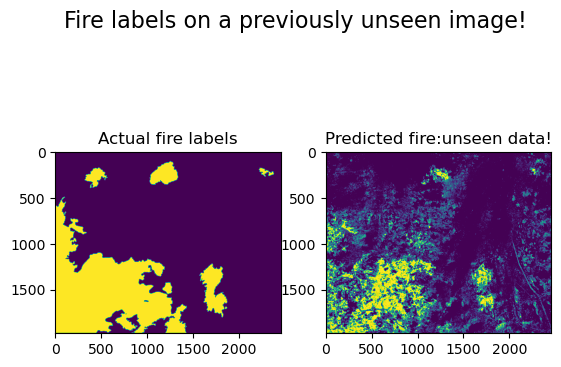

In [50]:
# like before, let's see how the labels compare
fig, axs = plt.subplots(1, 2)
fig.suptitle("Fire labels on a previously unseen image!", fontsize=16)
axs[0].imshow(fires_arr.reshape(rows, cols))
axs[0].title.set_text("Actual fire labels")
axs[1].imshow(prediction_on_validation.reshape(rows, cols))
axs[1].title.set_text("Predicted fire:unseen data!")
plt.show()

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# train a random forest classifier

classifier = RandomForestClassifier()  # create an instance of the classifier
classifier = classifier.fit(x_train, y_train)  # train it! Only show it the training data
predictions = classifier.predict(x_test)

# Assess the model's accuracy on validation data

print("accuracy on the test data: " + str(classifier.score(x_test, y_test)))
print("kappa score on the test data" + str(sklearn.metrics.cohen_kappa_score(y_test, predictions)))

accuracy on the test data: 0.915753012296603
kappa score on the test data0.750923227085747


In [53]:
# Make predictions on test data (different image)
with rasterio.open(validation_path, 'r') as src:
    validation_arr = src.read()
    validation_meta = src.meta

validation_arr = np.reshape(validation_arr, (bands, rows * cols))
validation_arr = np.swapaxes(validation_arr, 0, 1)

# Assess the model's accuracy and kappa score
prediction_on_validation = classifier.predict(validation_arr)
print("accuracy: " + str(classifier.score(validation_arr, fires_arr)))
print("kappa: " + str(sklearn.metrics.cohen_kappa_score(fires_arr, prediction_on_validation)))

accuracy: 0.8228148263609256
kappa: 0.4466903528967562


### Compare Model Evaluation:
|Evaluation Method| KNN | Random Forest |CART|
| --- | --- | --- | --- |
|Accuracy| 0.898 | 0.916 |0.867|
|Kappa Coefficient| 0.709 | 0.7527|0.640|

Based on two evaluation methods the Random Forest algorithm performed the best for predicting whether or not there has been a fire. 